<div style='background-image: url("../share/Aerial_view_LLNL.jpg") ; padding: 0px ; background-size: cover ; border-radius: 15px ; height: 250px; background-position: 0% 80%'>
    <div style="float: right ; margin: 50px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.8) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.9) ; line-height: 100%">ObsPy Tutorial</div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.7)">Downloading Data</div>
        </div>
    </div>
</div>

### **2017 CIG-LLNL Computational Seismology Workshop**

Seismo-Live: http://seismo-live.org

##### Authors:
* Lion Krischer ([@krischer](https://github.com/krischer))
* Tobias Megies ([@megies](https://github.com/megies))
---

![](images/obspy_logo_full_524x179px.png)

In [2]:
%matplotlib inline
from __future__ import print_function
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 12, 8

ObsPy has clients to directly fetch data via...

- FDSN webservices (IRIS, Geofon/GFZ, USGS, NCEDC, SeisComp3 instances, ...)
- ArcLink (EIDA, ...)
- Earthworm
- SeedLink (near-realtime servers)
- NERIES/NERA/seismicportal.eu
- NEIC
- SeisHub (local seismological database)

This introduction shows how to use the FDSN webservice client. The FDSN webservice definition is by now the default web service implemented by many data centers world wide. Clients for other protocols work similar to the FDSN client.

#### Waveform Data

1 Trace(s) in Stream:
II.PFO.00.LHZ | 2014-08-24T10:15:44.069500Z - 2014-08-24T10:40:43.069500Z | 1.0 Hz, 1500 samples


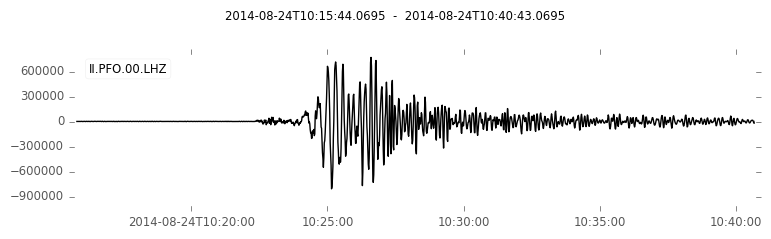

In [3]:
import obspy
from obspy.clients.fdsn import Client

client = Client("IRIS")
t = obspy.UTCDateTime("2014-08-24T10:20:44.0")  # South Napa Earthquake
st = client.get_waveforms("II", "PFO", "00", "LHZ",
                          t - 5 * 60, t + 20 * 60)
print(st)
st.plot()

- again, waveform data is returned as a Stream object
- for all custom processing workflows it does not matter if the data originates from a local file or from a web service

#### Event Metadata

The FDSN client can also be used to request event metadata:

1 Event(s) in Catalog:
2014-08-24T10:20:45.600000Z | +38.201, -122.086 | 6.1 MW


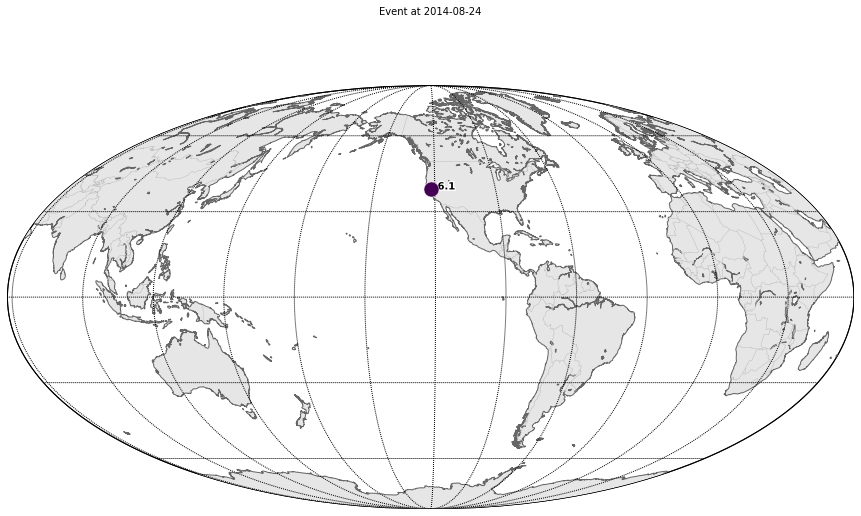

In [4]:
t = obspy.UTCDateTime("2014-08-24T10:20:44.0")  # South Napa earthquake
catalog = client.get_events(starttime=t - 100, endtime=t + 3600,
                            minmagnitude=6)
print(catalog)
catalog.plot();

Requests can have a wide range of constraints (see [ObsPy Documentation](http://docs.obspy.org/packages/autogen/obspy.clients.fdsn.client.Client.get_events.html)):

- time range
- geographical (lonlat-box, circular by distance)
- depth range
- magnitude range, type
- contributing agency

#### Station Metadata

Finally, the FDSN client can be used to request station metadata. Stations can be looked up using a wide range of constraints (see [ObsPy documentation](http://docs.obspy.org/packages/autogen/obspy.clients.fdsn.client.Client.get_stations.html)):

 * network/station code
 * time range of operation
 * geographical (lonlat-box, circular by distance)

Inventory created at 2017-09-15T19:19:02.000000Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.27
		    http://service.iris.edu/fdsnws/station/1/query?starttime=2017-09-15...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (3):
			GS
			NC
			NP
		Stations (13):
			GS.LV1B (Tri-Valley urban array)
			GS.LV1C (Tri-Valley urban array)
			GS.LV1D (Tri-Valley urban array)
			GS.LV1E (Tri-Valley urban array)
			GS.LV1F (Tri-Valley urban array)
			GS.LV1G (Tri-Valley urban array)
			GS.LV1H (Tri-Valley urban array)
			GS.LV1I (Tri-Valley urban array)
			GS.TVK4 (Tri-Valley urban array)
			NC.CBZ (Buffer Zone)
			NP.1786 (Livermore FS 6 East Av)
			NP.1803 (Livermore FS 8 Scenic)
			NP.1842 (Livermore FS 7 Rincon)
		Channels (0):



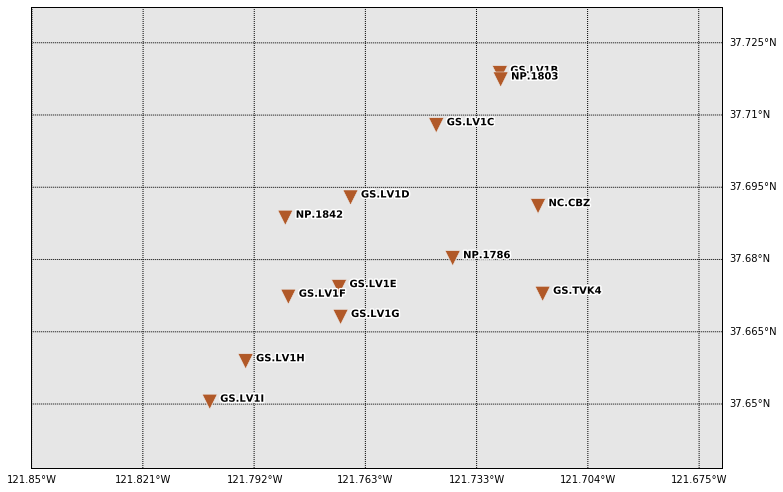

In [5]:
event = catalog[0]
origin = event.origins[0]

# Livermore
lon = -121.768005
lat = 37.681873

# Get currently active stations in 5 km radius around Livermore.
inventory = client.get_stations(longitude=lon, latitude=lat,
                                maxradius=0.05, level="station", 
                                starttime=obspy.UTCDateTime())
print(inventory)
inventory.plot(projection="local", resolution="i");

The **`level=...`** keyword is used to specify the level of detail in the requested inventory

- `"network"`: only return information on networks matching the criteria
- `"station"`: return information on all matching stations
- `"channel"`: return information on available channels in all stations networks matching the criteria
- `"response"`: include instrument response for all matching channels (large result data size!)

In [6]:
inventory = client.get_stations(network="II", station="PFO",
                                level="station")
print(inventory)

Inventory created at 2017-09-15T19:19:36.000000Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.27
		    http://service.iris.edu/fdsnws/station/1/query?network=II&station=P...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			II
		Stations (2):
			II.PFO (Pinon Flat, California, USA)
			II.PFO (Pinon Flat, California, USA)
		Channels (0):



In [7]:
inventory = client.get_stations(network="II", station="PFO",
                                level="channel")
print(inventory)

Inventory created at 2017-09-15T19:19:41.000000Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.27
		    http://service.iris.edu/fdsnws/station/1/query?network=II&station=P...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			II
		Stations (2):
			II.PFO (Pinon Flat, California, USA)
			II.PFO (Pinon Flat, California, USA)
		Channels (566):
			II.PFO..LOG, II.PFO..LOG, II.PFO.00.BH1, II.PFO.00.BH1,
			II.PFO.00.BH1, II.PFO.00.BH1, II.PFO.00.BH1, II.PFO.00.BH1,
			II.PFO.00.BH1, II.PFO.00.BH1, II.PFO.00.BH1, II.PFO.00.BH1,
			II.PFO.00.BH2, II.PFO.00.BH2, II.PFO.00.BH2, II.PFO.00.BH2,
			II.PFO.00.BH2, II.PFO.00.BH2, II.PFO.00.BH2, II.PFO.00.BH2,
			II.PFO.00.BHE, II.PFO.00.BHE, II.PFO.00.BHE, II.PFO.00.BHE,
			II.PFO.00.BHE, II.PFO.00.BHE, II.PFO.00.BHE, II.PFO.00.BHE,
			II.PFO.00.BHE, II.PFO.00.BHE, II.PFO.00.BHE, II.PFO.00.BHE,
			II.PFO.00.BHE, II.PFO.00.BHE, II.PFO.00.BHE, II.PFO.00.BHE,
			II.PFO.00.BHE, II.PFO.00.BHE, II.PFO.00.BHN, II.PFO.00.

For waveform requests that include instrument correction, the appropriate instrument response information also has to be downloaded.

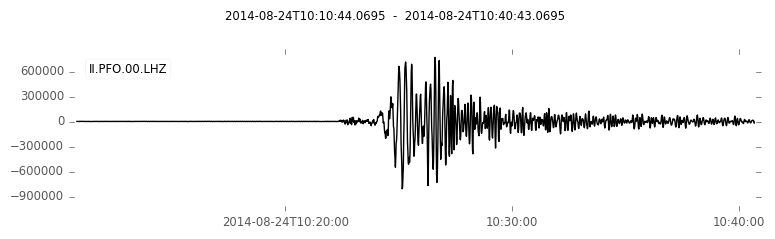

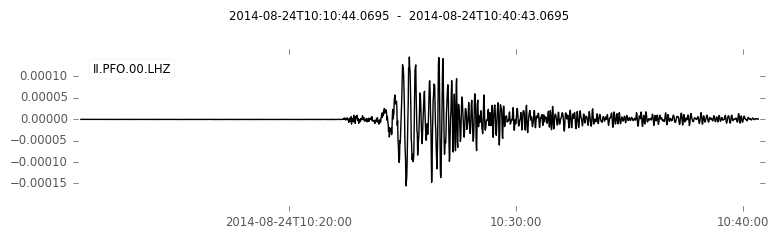

In [9]:
t = obspy.UTCDateTime("2014-08-24T10:20:44.0")  # South Napa earthquake
st = client.get_waveforms("II", "PFO", "00", "LHZ",
                          t - 10 * 60, t + 20 * 60)
inv = client.get_stations(network="II", station="PFO", location="00", channel="LHZ",
                          level="response", starttime=t - 10, endtime=t + 10)
st.plot()

st.remove_response(inventory=inv)
st.plot()

All data requested using the FDSN client can be directly saved to file using the **`filename="..."`** option. The data is then stored exactly as it is served by the data center, i.e. without first parsing by ObsPy and outputting by ObsPy.

In [11]:
client.get_events(starttime=t-100, endtime=t+24*3600, minmagnitude=5,
                  filename="/tmp/requested_events.xml")
client.get_stations(network="II", station="PFO", level="station",
                    filename="/tmp/requested_stations.xml")
client.get_waveforms("II", "PFO", "00", "LHZ", t - 10 * 60, t + 20 * 60,
                     filename="/tmp/requested_waveforms.mseed")
!ls -lrt /tmp/requested*

-rw-r--r--  1 lion  wheel  11515 Sep 15 21:22 /tmp/requested_events.xml
-rw-r--r--  1 lion  wheel  24853 Sep 15 21:22 /tmp/requested_stations.xml
-rw-r--r--  1 lion  wheel  12288 Sep 15 21:22 /tmp/requested_waveforms.mseed


#### FDSN Client Exercise

Use the FDSN client to assemble a small waveform dataset for on event.

- search for a large earthquake (e.g. by depth or in a region of your choice, use option **`limit=5`** to keep network traffic down)

5 Event(s) in Catalog:
2017-01-10T06:13:47.250000Z |  +4.463, +122.575 | 7.3 Mww
2015-11-24T22:50:54.370000Z | -10.060,  -71.018 | 7.6 mww
2015-11-24T22:45:38.880000Z | -10.537,  -70.944 | 7.6 mww
2015-05-30T11:23:02.110000Z | +27.839, +140.493 | 7.8 mww
2015-02-27T13:45:05.370000Z |  -7.297, +122.535 | 7.0 mww


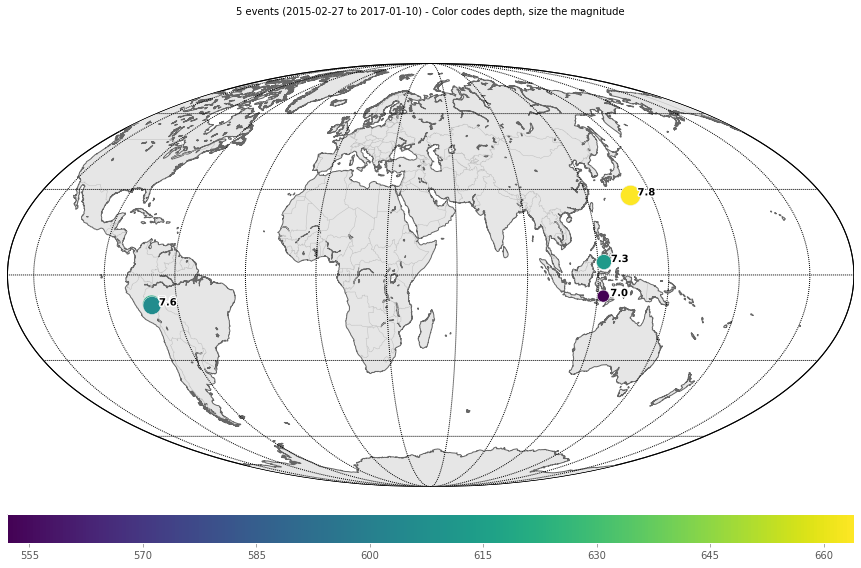

Event:	2017-01-10T06:13:47.250000Z |  +4.463, +122.575 | 7.3 Mww

	            resource_id: ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?eventid=9953968")
	             event_type: 'earthquake'
	    preferred_origin_id: ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?originid=19442454")
	 preferred_magnitude_id: ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?magnitudeid=177906272")
	                   ---------
	     event_descriptions: 1 Elements
	                origins: 1 Elements
	             magnitudes: 1 Elements


In [12]:
from obspy.clients.fdsn import Client

client = Client("IRIS")
catalog = client.get_events(minmagnitude=7, limit=5, mindepth=400)
print(catalog)
catalog.plot()
event = catalog[0]
print(event)

- search for stations to look at waveforms for the event. stations should..
    * be available at the time of the event
    * use a vertical 1 Hz stream ("LHZ", to not overpower our network..)
    * be in a narrow angular distance around the event (e.g. 90-91 degrees)
    * adjust your search so that only a small number of stations (e.g. 3-6) match your search criteria
    * Once you found a good set of stations, please use `level="response"` as you will need the response later on.

In [15]:
origin = event.origins[0]
t = origin.time

inventory = client.get_stations(longitude=origin.longitude, latitude=origin.latitude,
                                minradius=101, maxradius=102,
                                starttime=t, endtime =t+100,
                                channel="LHZ", level="response",
                                matchtimeseries=True)
print(inventory)

Inventory created at 2017-09-15T19:26:14.000000Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.27
		    http://service.iris.edu/fdsnws/station/1/query?starttime=2017-01-10...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (4):
			CH
			DK
			MN
			PB
		Stations (8):
			CH.FUORN (Ofenpass-Fuorn)
			CH.LIENZ (Kamor / St. Gall)
			DK.SCO (Ittoqqortoormiit, Greenland)
			MN.WDD (Wied Dalam)
			PB.B003 (floequarybwa2005, FloeQuarry, WA, USA)
			PB.B004 (hokofallsbwa2005, Sekiu, WA, USA)
			PB.B926 (cowich926bbc2007, Port Renfrew, BC, Canada)
			PB.B927 (albern927bbc2007, Port Alberni, BC, USA)
		Channels (8):
			CH.FUORN..LHZ, CH.LIENZ..LHZ, DK.SCO..LHZ, MN.WDD..LHZ,
			PB.B003..LHZ, PB.B004..LHZ, PB.B926..LHZ, PB.B927..LHZ


- for each of these stations download data of the event, e.g. a couple of minutes before to half an hour after the event
- put all data together in one stream (put the `get_waveforms()` call in a try/except/pass block to silently skip stations that actually have no data available)
- print stream info, plot the raw data

5 Trace(s) in Stream:
CH.FUORN..LHZ | 2017-01-10T06:08:48.105000Z - 2017-01-10T06:43:47.105000Z | 1.0 Hz, 2100 samples
DK.SCO..LHZ   | 2017-01-10T06:08:48.000000Z - 2017-01-10T06:43:47.000000Z | 1.0 Hz, 2100 samples
PB.B004..LHZ  | 2017-01-10T06:08:48.069500Z - 2017-01-10T06:43:47.069500Z | 1.0 Hz, 2100 samples
PB.B926..LHZ  | 2017-01-10T06:08:48.069500Z - 2017-01-10T06:43:47.069500Z | 1.0 Hz, 2100 samples
PB.B927..LHZ  | 2017-01-10T06:08:48.069500Z - 2017-01-10T06:43:47.069500Z | 1.0 Hz, 2100 samples


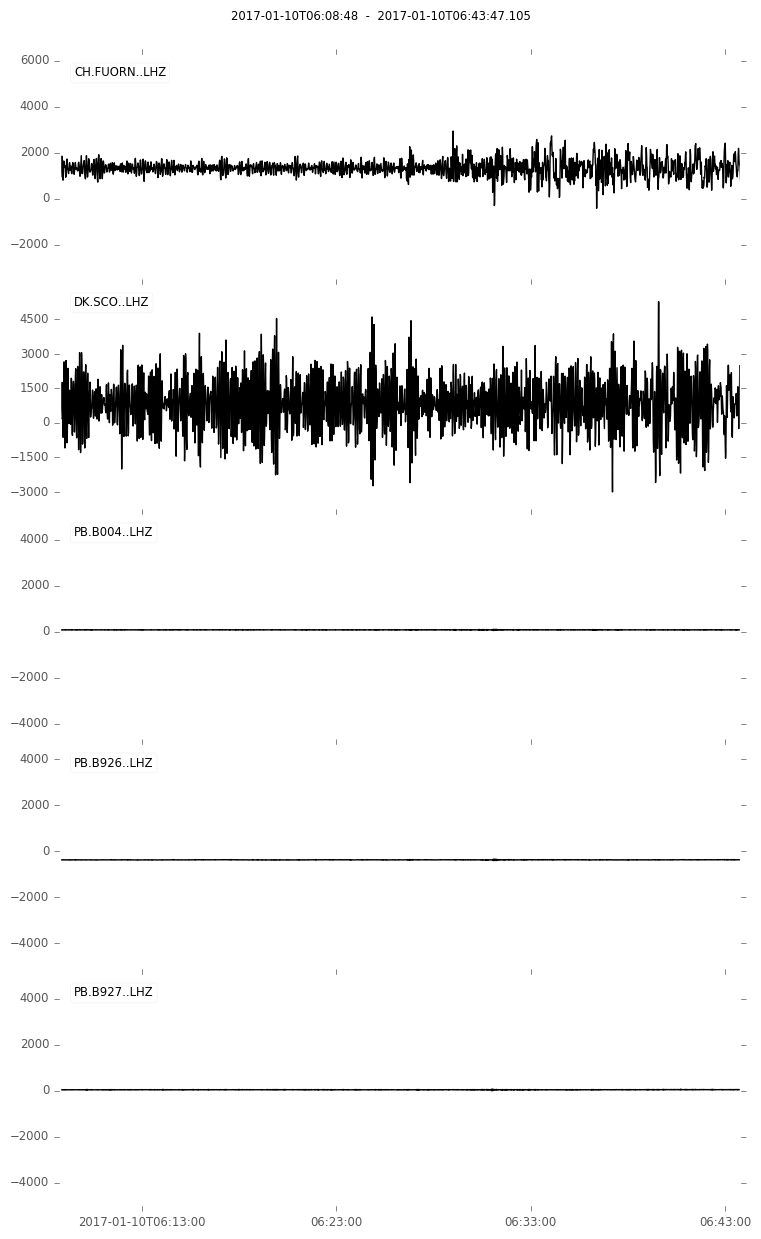

In [16]:
from obspy import Stream
st = Stream()

for network in inventory:
    for station in network:
        try:
            st += client.get_waveforms(network.code, station.code, "*", "LHZ",
                                       t - 5 * 60, t + 30 * 60)
        except:
            pass

print(st)
st.plot()

- correct the instrument response for all stations and plot the corrected data

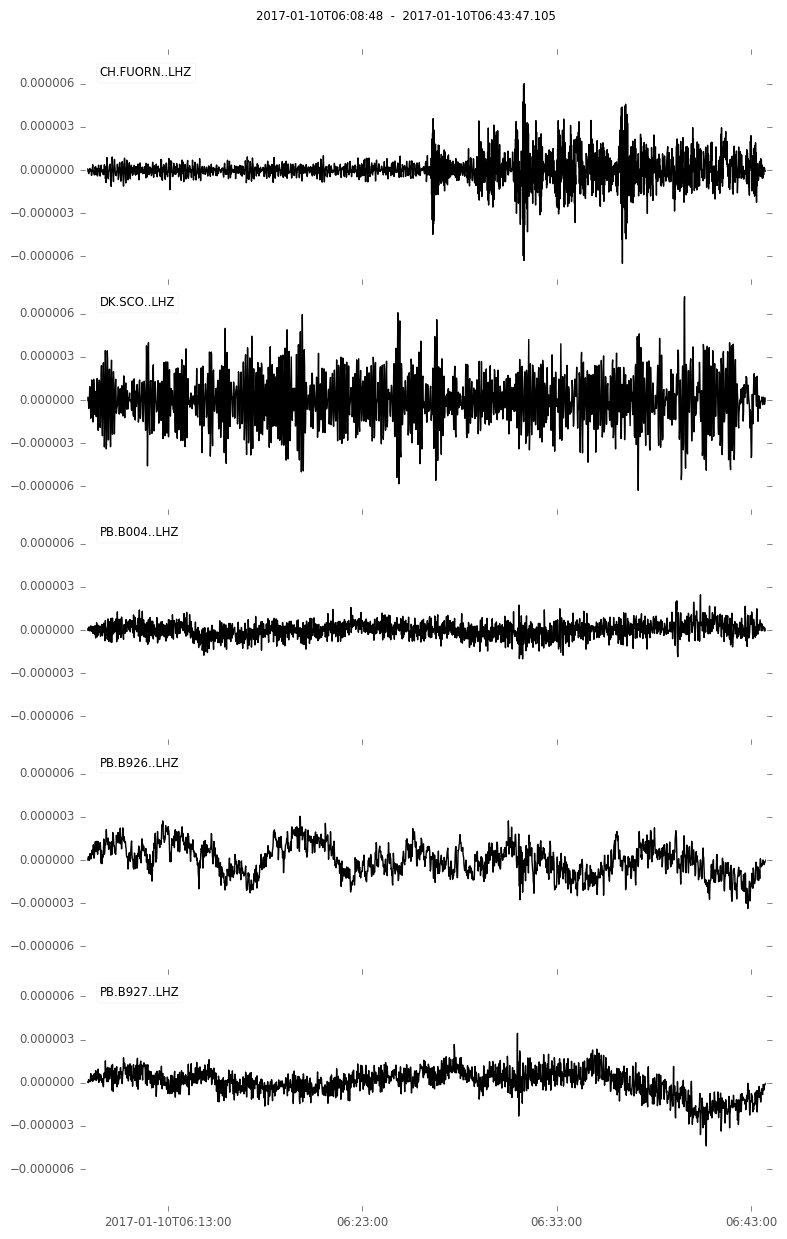

In [18]:
st.remove_response(inventory=inventory, water_level=20)
st.plot()

If you have time, assemble and plot another similar dataset (e.g. like before stations at a certain distance from a big event, or use Transportable Array data for a big event, etc.)